In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.decomposition import PCA

Here we carry out EDA principal component analysis (PCA) of a [dataset](https://datarepository.wolframcloud.com/resources/Sample-Data-Swiss-Bank-Notes) of Swiss bank notes. We aim to reduce dimensionality of this dataset to be able to train a neural network so that it can recognise counterfeit banknotes with high probability. PCA is a statistical technique used to look at the interrelations in a set of variables in order to identify the underlying structure of those variables. It is a non-parametric technique so the features does not have to have come from any particular distribution. 

The assumptions of PCA:
1. Linearity
• Assumes the data set to be linear combinations of the variables.

2. The importance of mean and covariance
• There is no guarantee that the directions of maximum variance will contain good features for discrimination.

3. That large variances have important dynamics
• Assumes that components with larger variance correspond to interesting dynamics and lower ones correspond to noise.

It is found that for our dataset PCA works well, however this is not always the case and other techniques may need to be used for non-linear datasets e.g. Kernel PCA. 

There are a number of ways for deciding the number of principal componenets. Jolliffe (2002) groups methods for choosing the number of PCs into three branches: subjective methods (e.g., the scree plot), distribution-based test tools (e.g., Bartlett’s test), and computational procedures (e.g., cross-validation). According to Choi et al. (2015) each branch has advantages as well as disadvantages, and no single method has emerged as the community standard.

In this post we show two related methods, the scree plot ("elbow method") and the threshold of cumulative variance.

The scree plot “elbow” method aims to determine the point where adding another principal component does not explain much variance in comparison to previous principal components. 

Another method directly connected with the scree plot method is picking a threshold of cumulative variance explained by the first n PCs. We can choose q to be the smallest integer such that the q first PCs explain at least x% of variance. 

In [2]:
df = pd.read_csv("Sample-Data-Swiss-Bank-Notes.csv") # https://datarepository.wolframcloud.com/resources/Sample-Data-Swiss-Bank-Notes
df.head()

,Length,Left,Right,Bottom,Top,Diagonal,Genuine/Counterfeit
0,"Quantity[214.8, ""Millimeters""]","Quantity[131, ""Millimeters""]","Quantity[131.1, ""Millimeters""]","Quantity[9, ""Millimeters""]","Quantity[9.7, ""Millimeters""]","Quantity[141, ""Millimeters""]",counterfeit
1,"Quantity[214.6, ""Millimeters""]","Quantity[129.7, ""Millimeters""]","Quantity[129.7, ""Millimeters""]","Quantity[8.1, ""Millimeters""]","Quantity[9.5, ""Millimeters""]","Quantity[141.7, ""Millimeters""]",counterfeit
2,"Quantity[214.8, ""Millimeters""]","Quantity[129.7, ""Millimeters""]","Quantity[129.7, ""Millimeters""]","Quantity[8.7, ""Millimeters""]","Quantity[9.6, ""Millimeters""]","Quantity[142.2, ""Millimeters""]",counterfeit
3,"Quantity[214.8, ""Millimeters""]","Quantity[129.7, ""Millimeters""]","Quantity[129.6, ""Millimeters""]","Quantity[7.5, ""Millimeters""]","Quantity[10.4, ""Millimeters""]","Quantity[142, ""Millimeters""]",counterfeit
4,"Quantity[215, ""Millimeters""]","Quantity[129.6, ""Millimeters""]","Quantity[129.7, ""Millimeters""]","Quantity[10.4, ""Millimeters""]","Quantity[7.7, ""Millimeters""]","Quantity[141.8, ""Millimeters""]",counterfeit


In [3]:
df2 = df.iloc[:,:6].applymap(lambda x: str(x).strip(' Quantity"Millimeters[],'))

In [4]:
import pandas_profiling
pandas_profiling.ProfileReport(df2)

Text(0.5, 1.0, 'Scree Plot')

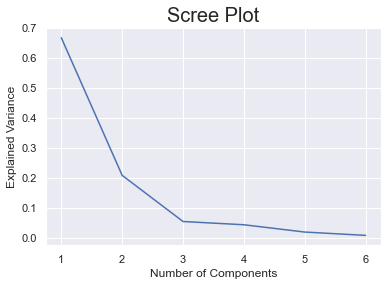

In [5]:
# Scree Plot
pca1 = PCA().fit(df2)
plt.plot(range(1,len(pca1.explained_variance_ratio_)+1),pca1.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance');
plt.title("Scree Plot", size = 20)

Above we can identify an "elbow” on the 3rd principal component. According to this method, we choose number of PCs just before the “elbow” which is 2.

In [6]:
pca = PCA(n_components=2) # project from 6 to 2 dimensions
projected = pca.fit_transform(df2)
print(df2.shape)
print(projected.shape)

(200, 6)
(200, 2)


Sklearn's PCA class centres the data but does not scale it. Here we scale the data to have a variance of 1 before carrying out PCA. Now all features in the dataset are standardised.

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2sc = sc.fit_transform(df2) # standardising data
print(df2sc)

[[-0.25558323  2.43945206  2.83704322 -0.28973195 -1.18673534  0.44937213]
 [-0.78804829 -1.17043716 -0.63638092 -0.91430383 -1.43644293  1.05839535]
 [-0.25558323 -1.17043716 -0.63638092 -0.49792258 -1.31158914  1.49341194]
 ...
 [-0.25558323  0.49566556  1.10033115  0.82061805  0.56121782 -0.42066104]
 [-0.52181576  1.6064007   2.09273805  1.2369993   0.68607161 -0.94268094]
 [-1.58674587 -0.61506959 -0.14017747  0.54303055  1.06063301 -0.76867431]]


In [8]:
pca = PCA(n_components=2) # project from 6 to 2 dimensions
projected2 = pca.fit_transform(df2sc)
print(df2sc.shape)
print(projected2.shape)

(200, 6)
(200, 2)


Text(0.5, 1.0, 'Scree Plot')

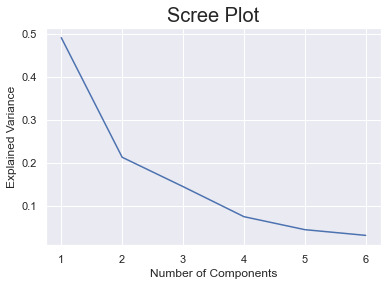

In [9]:
# Scree Plot
pca2 = PCA().fit(df2sc)
plt.plot(range(1,len(pca2.explained_variance_ratio_)+1),pca2.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance');
plt.title("Scree Plot", size = 20)

Similarly on the standardised data above we can again identify an "elbow” on the 3rd principal component. According to this method, we choose number of PCs just before the “elbow” which is 2.

The other way we can pick the number of PCs is to pick a threshold of cumulative variance we want our data to have.

Text(0.5, 1.0, 'Cumulative Explained Variance Plot')

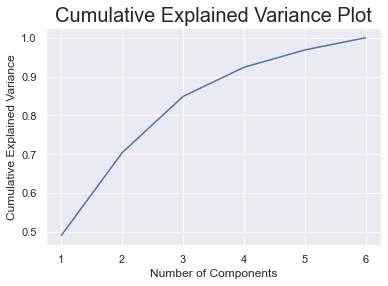

In [10]:
# Cumulative Explained Variance Plot
plt.plot(range(1,len(np.cumsum(pca2.explained_variance_ratio_))+1),np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');
plt.title("Cumulative Explained Variance Plot", size = 20)

If we choose the threshold of cumulative variance to be 90% then according to this method we should choose 3 PCs which explain in total 93% of the variance.

### PCA comparison Standardisation vs Non-standardisation

Text(0, 0.5, 'Explained Variance')

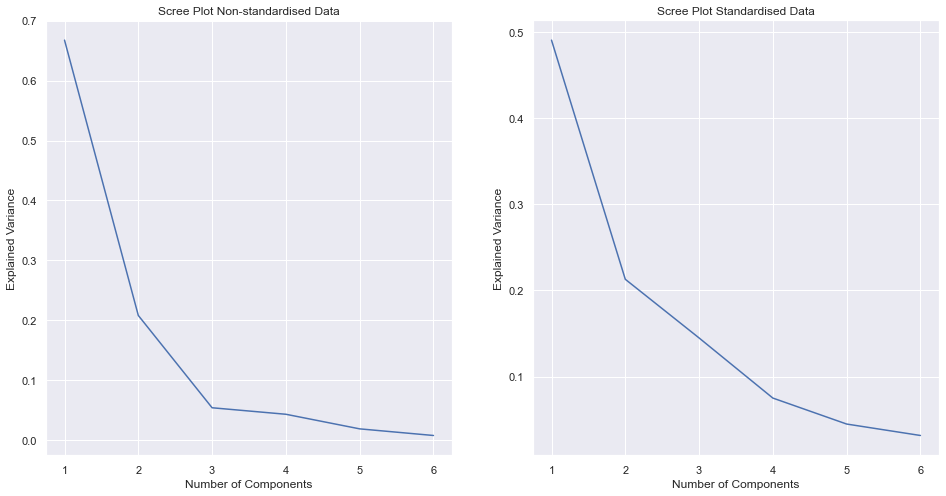

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.plot(range(1,len(pca1.explained_variance_ratio_)+1),pca1.explained_variance_ratio_)
ax2.plot(range(1,len(pca2.explained_variance_ratio_)+1),pca2.explained_variance_ratio_)
ax1.title.set_text('Scree Plot Non-standardised Data')
ax2.title.set_text('Scree Plot Standardised Data')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Explained Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Explained Variance')

PCA (Principal Component Analysis) finds new directions based on the covariance matrix of original variables. As the covariance matrix is sensitive to standardisation of variables, standardisation is important to assign equal weights to all the variables. In our dataset some of the variables have a larger standard deviation than others and this means that some might be given a higher weight than another, something we don't want. This means that if we don't standardise the variables before applying PCA, we will get misleading (and different) directions, as can be seen above.

In [12]:
projected = pd.DataFrame(projected)
projected['Genuine/Counterfeit']= df['Genuine/Counterfeit']
projected2 = pd.DataFrame(projected2)

projected2['Genuine/Counterfeit']= df['Genuine/Counterfeit']

[Text(0.5, 0, 'Principal component 1'), Text(0, 0.5, 'Principal component 2')]

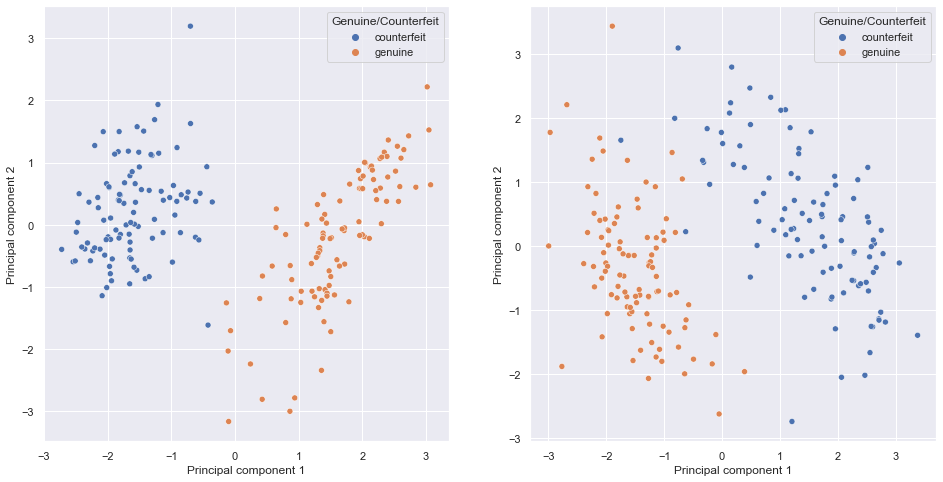

In [13]:
fig, ax =plt.subplots(1,2, figsize=(16,8))
sns.scatterplot(x=projected.iloc[:,0], y=projected.iloc[:,1], data=projected, hue="Genuine/Counterfeit", ax=ax[0])
sns.scatterplot(x=projected2.iloc[:,0], y=projected2.iloc[:,1], data=projected2, hue="Genuine/Counterfeit", ax=ax[1])
ax[0].set(xlabel="Principal component 1", ylabel="Principal component 2")
ax[1].set(xlabel="Principal component 1", ylabel="Principal component 2")

### First 2 principal components of non-standardised data (left) and standardised data (right).

For non-standardised data, the new basis show both genuine and counterfeit banknotes as separate groups, with little overlap. Based on this finding we may classify new banknotes to be genuine, or counterfeit. The spread of the data for genuine banknotes is relatively small in comparison to counterfeit banknotes.

For standardised data, the new basis also show both genuine and counterfeit banknotes as separate groups, but with noticeable overlap. The spread of the data for both banknotes is higher compared to the non-standardised data. There are also many more outliers. 

## Why dimensionality reduction is important

There are many benefits of dimensionality reduction techniques such as PCA, one of them is that it reduces model computation time and storage space required. If we were to model a larger dataset of bank notes we could be required to deal with millions of rows, with just 200 notes it is not a problem but when the data gets large it can matter a lot. Additionally, reducing the number of dimensions leads to the removal of multicollinearity. This can improve the interpretation of the parameters of an ML model. For example, in a regression model multicollinearity reduces the precision of the estimate coefficients and therefore weakens the statistical power of the model. Furthermore, in higher dimensions we cannot visualise the data. In our case above we cannot visualise the bank notes in 6 dimensions but we can deal with 2. Being able to visualise data can help us see patterns we would not be able to see otherwise.